## Week 1 exercise

All of the functions and code that you need for this exercise will be covered in the notebook from Week 9 called *lecture-1-exploratory-data-analysis.ipynb*

Parts 1, 4 and 5 of this notebook will be important for your coursework.

You are given a dataset of materials. This data contains both inter-metallic materials and ionic materials. The data also has a series of features that describe each material. Your task this week is to explore the relationships between the descriptors. Look for any suspicious data. Decide if any descriptors are very highly correlated. Reduce the dimensionality and look at some initial clustering of the data.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 Load and look at the data

* Use pandas to read `training-data-week-1.pickle`.
```
df = pd.read_pickle('training-data-week-1.pickle')
```
* Take a look at the top few entries of this data frame. See part 2 of *lecture-1-exploratory-data-analysis.ipynb*.
```
df.head()
```
* Explore some non-graphical summary statistics of the different columns using pandas. See part 2 of *lecture-1-exploratory-data-analysis.ipynb*.
```
df.describe()
```
* Get information about the types of data in each column using pandas. See part 2 of *lecture-1-exploratory-data-analysis.ipynb*.
```
df.info()
```

In [3]:
df = pd.read_pickle('training-data-week-1.pickle')

In [4]:
df.head()

Radius mode  Radius mean  Eneg range  Eneg max  GSbandgap mode  \
621        145.0       139.25        0.12      1.93            0.00   
517        145.0       141.75        0.10      1.93            0.00   
841        192.0       197.75        0.12      1.22            0.00   
81          57.0        76.20        2.35      3.98            1.97   
30          57.0        94.50        1.98  10000.00            0.00   

     GSbandgap range  Eneg avg_dev  Radius avg_dev  band_gap  labels  
621             0.00        0.0450           8.625    0.0000     1.0  
517             0.00        0.0375           4.875    0.0000     1.0  
841             0.00        0.0450           8.625    0.0000     1.0  
81              1.97        0.7520          30.720    0.8423     0.0  
30              1.97        0.9900          37.500    1.9778     0.0

In [4]:
df.tail()

Radius mode  Radius mean  Eneg range  Eneg max  GSbandgap mode  \
17          57.0    73.000000        2.35      3.98            1.97   
507        215.0   222.250000        0.31      1.10            0.00   
628        144.0   144.500000        0.24      1.93            0.00   
147         57.0    84.333333        2.43      3.98            1.97   
159         57.0    63.750000        1.94      3.98            1.97   

     GSbandgap range  Eneg avg_dev  Radius avg_dev  band_gap  labels  
17             1.970      0.652778       26.666667    3.3381     0.0  
507            0.000      0.116250       10.875000    0.0000     1.0  
628            0.000      0.120000        0.500000    0.0000     1.0  
147            1.970      1.080000       36.444444    2.3648     0.0  
159            0.446      0.727500       10.125000    8.1393     0.0

In [5]:
df.head()

Radius mode  Radius mean  Eneg range  Eneg max  GSbandgap mode  \
621        145.0       139.25        0.12      1.93            0.00   
517        145.0       141.75        0.10      1.93            0.00   
841        192.0       197.75        0.12      1.22            0.00   
81          57.0        76.20        2.35      3.98            1.97   
30          57.0        94.50        1.98  10000.00            0.00   

     GSbandgap range  Eneg avg_dev  Radius avg_dev  band_gap  labels  
621             0.00        0.0450           8.625    0.0000     1.0  
517             0.00        0.0375           4.875    0.0000     1.0  
841             0.00        0.0450           8.625    0.0000     1.0  
81              1.97        0.7520          30.720    0.8423     0.0  
30              1.97        0.9900          37.500    1.9778     0.0

In [6]:
df.describe()

Radius mode  Radius mean  Eneg range      Eneg max  GSbandgap mode  \
count   749.000000   749.000000  749.000000    749.000000      749.000000   
mean    115.871829   126.523557    1.151662     16.035013        0.842697   
std      55.361014    45.598238    0.957164    365.295516        1.110069   
min      31.000000    41.400000    0.000000      1.100000        0.000000   
25%      57.000000    78.250000    0.300000      1.930000        0.000000   
50%     122.000000   134.500000    0.790000      1.930000        0.000000   
75%     145.000000   157.500000    2.050000      3.980000        1.970000   
max     244.000000   236.750000    3.190000  10000.000000        7.853000   

       GSbandgap range  Eneg avg_dev  Radius avg_dev    band_gap      labels  
count       749.000000    749.000000      749.000000  749.000000  749.000000  
mean          0.865665      0.433720       21.123655    1.467381    0.591455  
std           1.146503      0.370376       15.840512    2.274696    0.491893  
min           0.000000      0.000000        0.000000    0.000000    0.000000  
25%           0.000000      0.120000        8.160000    0.000000    0.000000  
50%           0.000000      0.311250       20.326531    0.000000    1.000000  
75%           1.970000      0.709091       30.720000    2.540000    1.000000  
max           7.853000      1.595000       93.500000    9.065200    1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 621 to 159
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Radius mode      749 non-null    float64
 1   Radius mean      749 non-null    float64
 2   Eneg range       749 non-null    float64
 3   Eneg max         749 non-null    float64
 4   GSbandgap mode   749 non-null    float64
 5   GSbandgap range  749 non-null    float64
 6   Eneg avg_dev     749 non-null    float64
 7   Radius avg_dev   749 non-null    float64
 8   band_gap         749 non-null    float64
 9   labels           749 non-null    float64
dtypes: float64(10)
memory usage: 64.4 KB


## 2 Graphical examination

Use seaborn to plot scatters of the different variables against each other.

```
import seaborn as sns
sns.pairplot(df)
```

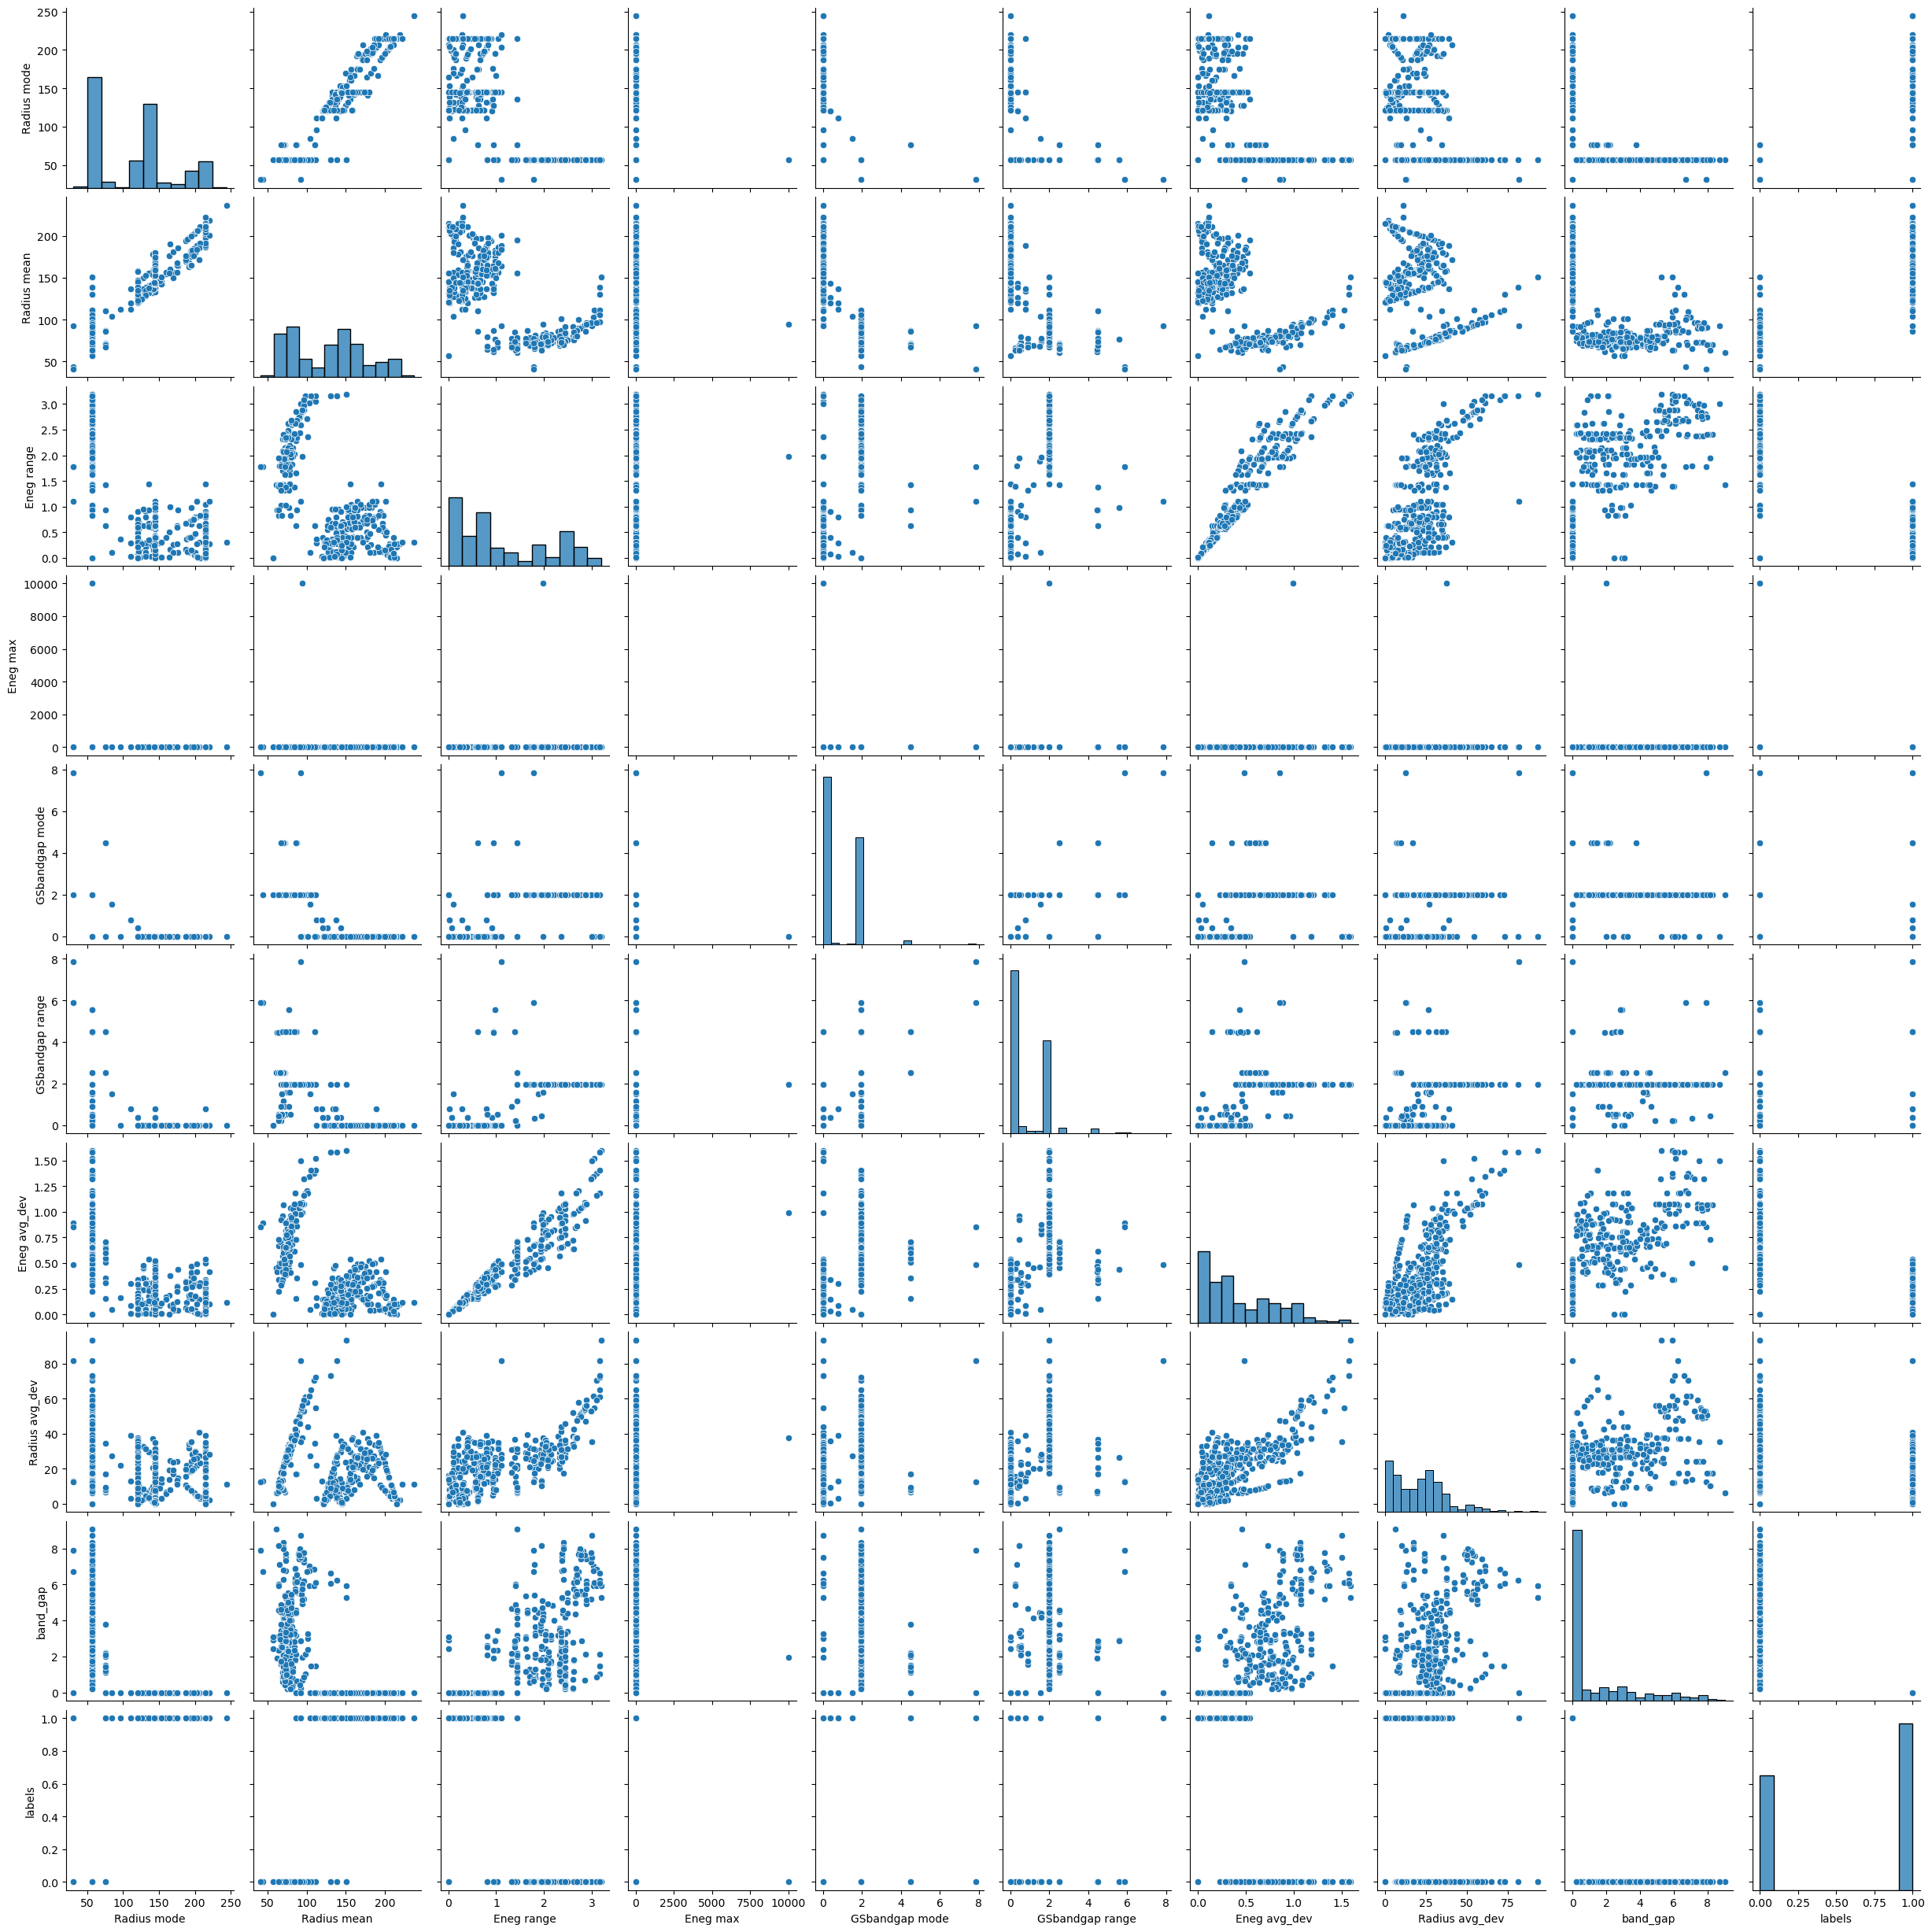

In [8]:
import seaborn as sns
sns.pairplot(df)

## 3 Inspect the individual distributions

For each column calculate the skew and the kurtosis for each of the columns. Which data has the highest mean and the highest kurtosis?
You can get a list of columns using:

```
column_names = list(df.columns)
print(column_names)
```


Use the code for `skew` and `kurt` from section 4.2 of *lecture-1-exploratory-data-analysis.ipynb*


In [5]:
column_names = list(df.columns)
print(column_names)

['Radius mode', 'Radius mean', 'Eneg range', 'Eneg max', 'GSbandgap mode', 'GSbandgap range', 'Eneg avg_dev', 'Radius avg_dev', 'band_gap', 'labels']


In [6]:
print(f"Skewness: {df['Radius mode'].skew()}")
print(f"Kurtosis: {df['Radius mode'].kurt()}")

Skewness: 0.3053228907162729
Kurtosis: -1.1535291228883688


In [7]:
### Could do this as a for loop to save time!
for name in column_names:
    print(name, f"Skewness: {df[name].skew()}")
    print(name, f"Kurtosis: {df[name].kurt()}")

Radius mode Skewness: 0.3053228907162729
Radius mode Kurtosis: -1.1535291228883688
Radius mean Skewness: 0.23578151208981415
Radius mean Kurtosis: -1.0841328056532173
Eneg range Skewness: 0.5284207785061416
Eneg range Kurtosis: -1.1531318473254564
Eneg max Skewness: 27.3674888942275
Eneg max Kurtosis: 748.9862803566521
GSbandgap mode Skewness: 1.339764515141752
GSbandgap mode Kurtosis: 3.6197051748081575
GSbandgap range Skewness: 1.3757407905523131
GSbandgap range Kurtosis: 2.9044106228826796
Eneg avg_dev Skewness: 0.838380521158561
Eneg avg_dev Kurtosis: -0.15484386842652675
Radius avg_dev Skewness: 0.9690892916849011
Radius avg_dev Kurtosis: 1.445282845871764
band_gap Skewness: 1.477926736654532
band_gap Kurtosis: 1.0472108614566253
labels Skewness: -0.3728456639418025
labels Kurtosis: -1.865975847368262


## 4 Using boxplots 

Inspect each column and look for outliers 
* Make box plots for each of the columns
    * If you find a very serious outlier (say more than 1000 away from the mean value) drop it from the data - you will see the box plot disappear
    * If you find a bad outlier - remove that data
* Save the new clean dataframe to `week1-cleaned-data.pickle`
    
### Hints

You can put all of the boxplots together in a single figure. In this case we have 9 columns so you can make a 3x3 figure.
The code to get the number of columns is:
```
print(len(list(df.columns)))
```
The code to make the figure is:
```
column_names = list(df.columns)
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        data = df[df.columns[3*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(df.columns[3*i + j])
plt.tight_layout()
```


To drop the data, you can locate it using something like
```
df.drop(df[df['column name'] >= value].index, inplace = True)
```
To save the data
```
df.to_pickle('week1-cleaned-data.pickle')
```

### Plot the box plots

Get the number of features : `print(len(list(df.columns)))`

In this case we have 9 features - so we can do a 3x3 plot. Use this code:
```
column_names = list(df.columns)
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        data = df[df.columns[3*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(df.columns[3*i + j])
plt.tight_layout()
```

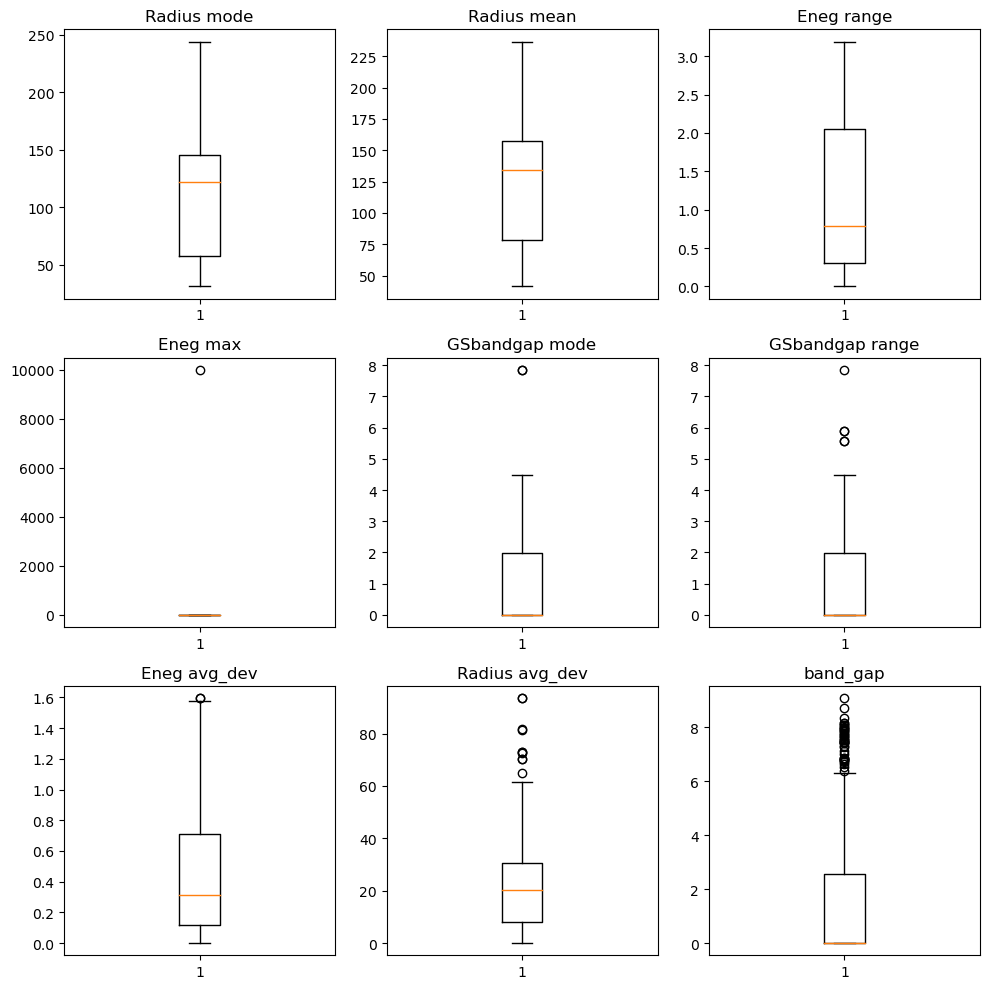

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        data = df[df.columns[3*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(df.columns[3*i + j])
plt.tight_layout()

### Identify outliers

Are there any box plots where there are points more than 1000 aaway from the mean?
If there are any - drop these rows from the data.

To drop the data, you can locate it using something like
```
df.drop(df[df['column name'] >= value].index, inplace = True)
```

When you have dropped the outliers, save the dataset:
```
df.to_pickle('week1-cleaned-data.pickle')
```

In [8]:
df.drop(df[df['Eneg max'] >= 1000].index, inplace = True)
df.to_pickle('week1-cleaned-data.pickle')

Do the 3x3 boxplots again and make sure outliers are gone.

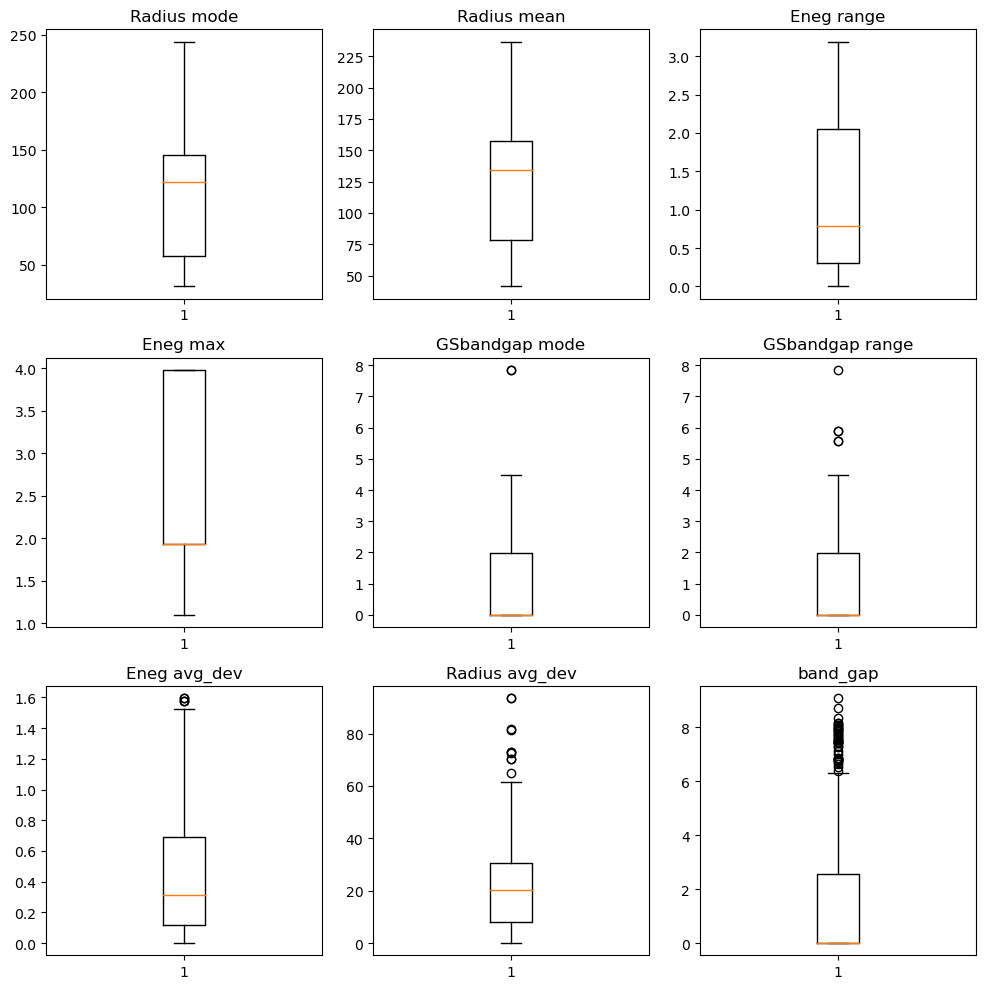

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
for i in range(3):
    for j in range(3):
        data = df[df.columns[3*i + j]].values
        ax[i, j].boxplot(data)
        ax[i, j].set_title(df.columns[3*i + j])
plt.tight_layout()

## 5 Correlations

Obtain the pearson correlations between the different columns and inspect them.
Which columns seems to be most closely related - are there any possibly redundant columns that you might remove?

The code for plotting Pearson correlations in a heatmap is in section 5 of the notebook *lecture-1-exploratory-data-analysis.ipynb* from Week 9. It is in the section *Explore correlations in the data*

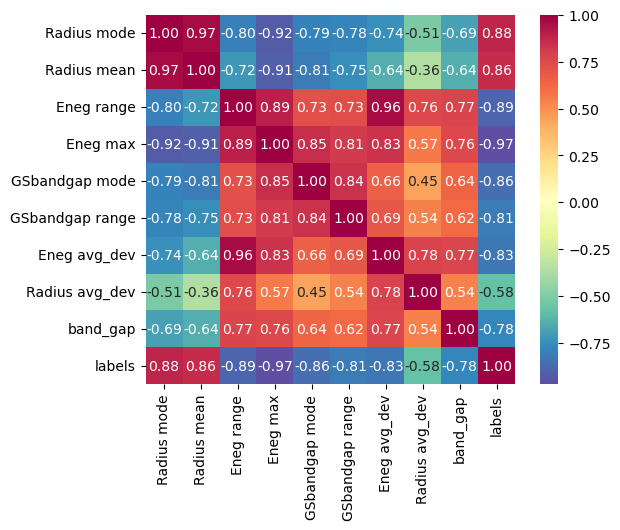

In [10]:
import seaborn as sns
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

#### Answer
I would say that the `Radius mean` and `Radius mode` seem highly correlated as do `Eneg avg_dev` and `Eneg range` and range Electronegativity. - we might choose to drop one of each of these pairs if building a future model. Because they do not add any additional information, but they do make the model more complex.

 Drop correlated data. 
```
df.drop([<list of columns to drop>], inplace=True, axis=1)
```

In [14]:
df.drop(['Radius mean', 'Eneg range'], inplace=True, axis=1)

Plot the heatmap again

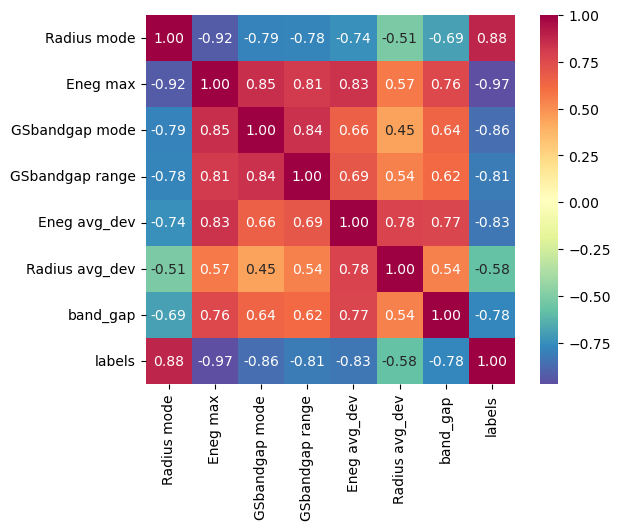

In [15]:
import seaborn as sns
corrmat = df.corr()
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=df.columns, 
                 xticklabels=df.columns, 
                 cmap="Spectral_r")
plt.show()

## 6 Look at data reduction and clustering (not needed for the course work, but useful)

We will see if we can cluser the data to separate those oxides with bandgaps and intermetallics with no band gaps.
First try it on the raw data, we will look for exmaple at the columns `Eneg avg_dev` and `Radius avg_dev`, colouring the points by the true labels and we will see how this shows up.

**Hint** The code you need for this can be found in the notebook from Week 9 *lecture-2-pca.ipynb* and *lecture-2-clustering-kmeans-GMM.ipynb*

* Plot `Eneg avg_dev` and `Radius avg_dev`, colour the points by the true labels (called 'labels' in this data). Use the following syntax:
```
plt.scatter(df['<variable 1>'].values, df['<variable 2>'].values, c=df['<variable for colour>'].values)
```
* Do a PCA with the same number of principal components as columns
* Use this to work out how many componants can accoun for about 99% of the variance
* Do a scatter plot in 2d of the first two compononents - colour the plot by the band_gap values - do you see a trend?
* Try to cluster this data using k-means
    * Use the code from *lecture-2-clustering-kmeans-GMM.ipynb*
        * Section - `Clustering using k-means`


# NB

Before doing the PCA etc convert the dataframe to an array and make sure you drop the label column. Use the code below:

    X = df.values
    labels = X[:, 9]
    X = X[:, :9]

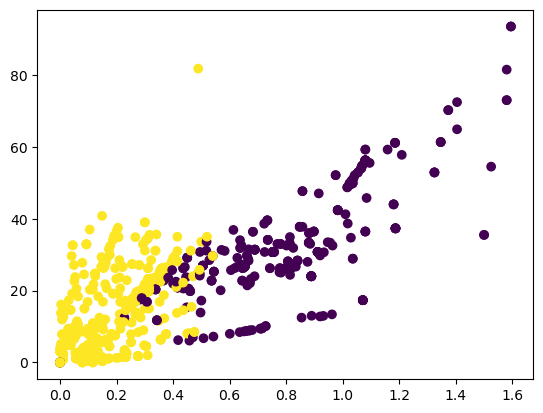

In [25]:
# Plot the two columns mentioned above
# Note that c means colour and we will colour by the bandgap, column 8
plt.scatter(df['Eneg avg_dev'].values, df['Radius avg_dev'].values, c=df['labels'].values)

In [26]:
X = df.values
labels = X[:, 7]
X = X[:, :7]

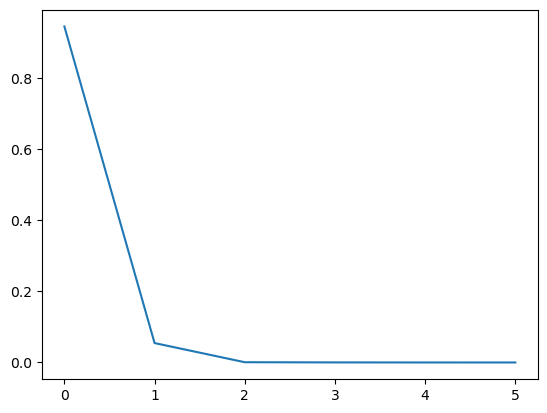

In [27]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6).fit(X)
plt.plot(pca.explained_variance_ratio_)

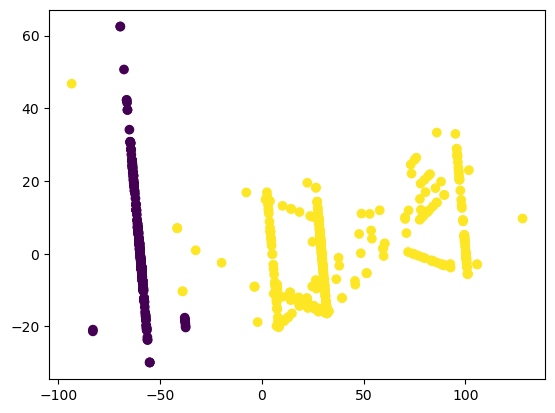

In [28]:
pca_out = PCA(n_components=2).fit_transform(X)
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=labels)

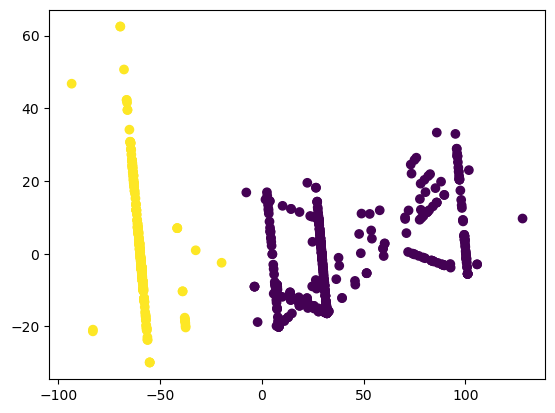

In [29]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(pca_out[:, 0], pca_out[:, 1], c=y_kmeans)